In [1]:
import tensorflow as tf

In [2]:
train_dir = './dataset/seg_train'
test_dir = './dataset/seg_test'

In [3]:
train_dataset = tf.keras.utils.image_dataset_from_directory(train_dir , image_size=(64, 64) , batch_size=32 , label_mode='int')
test_dataset = tf.keras.utils.image_dataset_from_directory(test_dir , image_size=(64, 64) , batch_size=32 , label_mode='int')

Found 14034 files belonging to 6 classes.
Found 3000 files belonging to 6 classes.


In [4]:
normalization_layer = tf.keras.layers.Rescaling(1. / 255)
train_dataset = train_dataset.map(lambda x, y: (normalization_layer(x), y))
test_dataset = test_dataset.map(lambda x, y: (normalization_layer(x), y))

In [5]:
tf.random.set_seed(1234)
model = tf.keras.Sequential([
    tf.keras.layers.InputLayer(input_shape=(64, 64, 3)),
    tf.keras.layers.Conv2D(32, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation='leaky_relu'),
    tf.keras.layers.Dense(6, activation='softmax')
])

model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

model.fit(train_dataset, epochs=10, validation_data=test_dataset)

Epoch 1/10


C:\Users\45rud\anaconda3\envs\tf\lib\site-packages\keras\src\layers\core\input_layer.py:27: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(


439/439 ━━━━━━━━━━━━━━━━━━━━ 20s 35ms/step - accuracy: 0.5769 - loss: 1.1033 - val_accuracy: 0.7063 - val_loss: 0.7873
Epoch 2/10
439/439 ━━━━━━━━━━━━━━━━━━━━ 11s 26ms/step - accuracy: 0.7464 - loss: 0.6924 - val_accuracy: 0.7660 - val_loss: 0.6551
Epoch 3/10
439/439 ━━━━━━━━━━━━━━━━━━━━ 11s 26ms/step - accuracy: 0.8089 - loss: 0.5281 - val_accuracy: 0.7823 - val_loss: 0.6157
Epoch 4/10
439/439 ━━━━━━━━━━━━━━━━━━━━ 11s 26ms/step - accuracy: 0.8538 - loss: 0.4119 - val_accuracy: 0.7660 - val_loss: 0.7132
Epoch 5/10
439/439 ━━━━━━━━━━━━━━━━━━━━ 11s 26ms/step - accuracy: 0.8907 - loss: 0.3061 - val_accuracy: 0.7837 - val_loss: 0.7361
Epoch 6/10
439/439 ━━━━━━━━━━━━━━━━━━━━ 12s 26ms/step - accuracy: 0.9262 - loss: 0.2171 - val_accuracy: 0.7587 - val_loss: 0.9125
Epoch 7/10
439/439 ━━━━━━━━━━━━━━━━━━━━ 12s 26ms/step - accuracy: 0.9427 - loss: 0.1638 - val_accuracy: 0.7870 - val_loss: 0.8901
Epoch 8/10
439/439 ━━━━━━━━━━━━━━━━━━━━ 12s 26ms/step - accuracy: 0.9641 - loss: 0.1043 - val_accurac

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 115ms/step


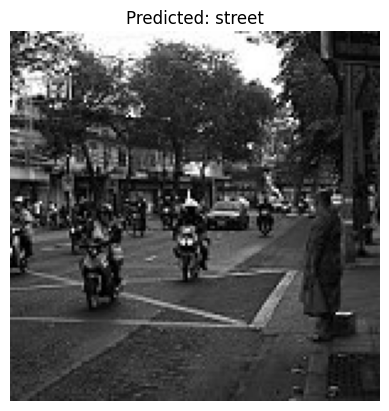

In [8]:
import matplotlib.pyplot as plt
import numpy as np
from PIL import Image


image_path = './dataset/seg_pred/seg_pred/3.jpg'  

img = Image.open(image_path).resize((64,64))  
img_array = np.array(img) / 255.0  
img_array = np.expand_dims(img_array, axis=0) 


predictions = model.predict(img_array)
predicted_class = np.argmax(predictions, axis=1)

index_obj ={
    0 : 'Building',
    1 : 'forest',
    2 : 'glacier',
    3 : 'mountain',
    4 : 'sea',
    5 : 'street'
}

plt.imshow(Image.open(image_path))
plt.title(f"Predicted: {index_obj[predicted_class[0]]}")
plt.axis('off')
plt.show()
